In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# One-Hot Encoding Implementation

#### One-hot encoding implementation exercise using python default libraries

In [ ]:
corpus = [
    "He loves NLP and NLP loves him",
    "NLP loves Python and Python loves NLP",
    "Python is great for NLP"
]

def get_vocabulary(corpus):
    vocabulary = set()
    for text in corpus:
        words = text.split()
        vocabulary.update(words)
    return sorted(vocabulary)

vocabulary = get_vocabulary(corpus)
print("Vocabulary:", vocabulary)

Vocabulary: ['He', 'NLP', 'Python', 'and', 'for', 'great', 'him', 'is', 'loves']


In [5]:
def one_hot_encode_word(vocabulary, word="I"):
    word_to_index = {word: idx for idx, word in enumerate(vocabulary)}
    one_hot = [0] * len(vocabulary)
    one_hot[word_to_index[word]] = 1
    return one_hot

one_hot_I = one_hot_encode_word(vocabulary, "He")
print("One-hot encoding for 'He':", one_hot_I)

One-hot encoding for 'He': [1, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
one_hot = []
for text in vocabulary:
    one_hot.append(one_hot_encode_word(vocabulary, text))
print("One-hot encoding for all words in vocabulary:")

for word, encoding in zip(vocabulary, one_hot):
    print(f"{word}: {encoding}")
    
one_hot_dict = {}
for word, encoding in zip(vocabulary, one_hot):
    one_hot_dict[word] = encoding
    
print("One-hot encoding dictionary:", one_hot_dict)

One-hot encoding for all words in vocabulary:
He: [1, 0, 0, 0, 0, 0, 0, 0, 0]
NLP: [0, 1, 0, 0, 0, 0, 0, 0, 0]
Python: [0, 0, 1, 0, 0, 0, 0, 0, 0]
and: [0, 0, 0, 1, 0, 0, 0, 0, 0]
for: [0, 0, 0, 0, 1, 0, 0, 0, 0]
great: [0, 0, 0, 0, 0, 1, 0, 0, 0]
him: [0, 0, 0, 0, 0, 0, 1, 0, 0]
is: [0, 0, 0, 0, 0, 0, 0, 1, 0]
loves: [0, 0, 0, 0, 0, 0, 0, 0, 1]
One-hot encoding dictionary: {'He': [1, 0, 0, 0, 0, 0, 0, 0, 0], 'NLP': [0, 1, 0, 0, 0, 0, 0, 0, 0], 'Python': [0, 0, 1, 0, 0, 0, 0, 0, 0], 'and': [0, 0, 0, 1, 0, 0, 0, 0, 0], 'for': [0, 0, 0, 0, 1, 0, 0, 0, 0], 'great': [0, 0, 0, 0, 0, 1, 0, 0, 0], 'him': [0, 0, 0, 0, 0, 0, 1, 0, 0], 'is': [0, 0, 0, 0, 0, 0, 0, 1, 0], 'loves': [0, 0, 0, 0, 0, 0, 0, 0, 1]}


In [7]:
for i in corpus:
    print(f"One-hot encoding for sentence: '{i}'")
    words = i.split()
    sentence_encoding = [one_hot_dict[word] for word in words]
    # sum the one-hot encodings for each word in the sentence
    sentence_vector = [int(bool(sum(x))) for x in zip(*sentence_encoding)]
    print(sentence_vector)

One-hot encoding for sentence: 'He loves NLP and NLP loves him'
[1, 1, 0, 1, 0, 0, 1, 0, 1]
One-hot encoding for sentence: 'NLP loves Python and Python loves NLP'
[0, 1, 1, 1, 0, 0, 0, 0, 1]
One-hot encoding for sentence: 'Python is great for NLP'
[0, 1, 1, 0, 1, 1, 0, 1, 0]


### One-Hot Encoding using CountVectorizer object in Sci-Kit Learn

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
one_hot_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(one_hot_df)


   and  for  great  he  him  is  loves  nlp  python
0    1    0      0   1    1   0      2    2       0
1    1    0      0   0    0   0      2    2       2
2    0    1      1   0    0   1      0    1       1


Problem: Where is the "I"?

This is because the pattern inside CountVectorizer is r"(?u)\b\w\w+\b"  where only sequences of 2 or more alphanumeric characters are considered.

In [9]:
vectorizer = CountVectorizer(binary=True, token_pattern=r"(?u)\b\w+\b")

X = vectorizer.fit_transform(corpus)
one_hot_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(one_hot_df)

   and  for  great  he  him  is  loves  nlp  python
0    1    0      0   1    1   0      1    1       0
1    1    0      0   0    0   0      1    1       1
2    0    1      1   0    0   1      0    1       1


# BoW encoding implementation

### BoW encoding implementation exercise using python default libraries


In [ ]:

vocabulary = get_vocabulary(corpus)

one_hot = []
for text in vocabulary:
    one_hot.append(one_hot_encode_word(vocabulary, text))
print("One-hot encoding for all words in vocabulary:")
    
one_hot_dict = {}
for word, encoding in zip(vocabulary, one_hot):
    one_hot_dict[word] = encoding
print("One-hot encoding dictionary:", one_hot_dict)

for i in corpus:
    print(f"One-hot encoding for sentence: '{i}'")
    words = i.split()
    sentence_encoding = [one_hot_dict[word] for word in words]
    # sum the one-hot encodings for each word in the sentence
    sentence_vector = [sum(x) for x in zip(*sentence_encoding)]
    print(sentence_vector)
    
# The only difference is int(bool(...)) vs sum(...)

One-hot encoding for all words in vocabulary:
One-hot encoding dictionary: {'He': [1, 0, 0, 0, 0, 0, 0, 0, 0], 'NLP': [0, 1, 0, 0, 0, 0, 0, 0, 0], 'Python': [0, 0, 1, 0, 0, 0, 0, 0, 0], 'and': [0, 0, 0, 1, 0, 0, 0, 0, 0], 'for': [0, 0, 0, 0, 1, 0, 0, 0, 0], 'great': [0, 0, 0, 0, 0, 1, 0, 0, 0], 'him': [0, 0, 0, 0, 0, 0, 1, 0, 0], 'is': [0, 0, 0, 0, 0, 0, 0, 1, 0], 'loves': [0, 0, 0, 0, 0, 0, 0, 0, 1]}
One-hot encoding for sentence: 'He loves NLP and NLP loves him'
[1, 2, 0, 1, 0, 0, 1, 0, 2]
One-hot encoding for sentence: 'NLP loves Python and Python loves NLP'
[0, 2, 2, 1, 0, 0, 0, 0, 2]
One-hot encoding for sentence: 'Python is great for NLP'
[0, 1, 1, 0, 1, 1, 0, 1, 0]


# Vector Embedding

### GloVe embeddings

In [ ]:
import numpy as np
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings
glove_embeddings = load_glove_embeddings('data/glove.6B.50d.txt')


In [20]:
glove_embeddings["the"]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

### Word2Vec using pretrained weights

In [ ]:
from gensim.models import KeyedVectors
word2vec_embeddings = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
word2vec_embeddings.get_vector('data')

300

### Exploring the dimensionality

In [26]:
# use PCA to reduce the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

words = ["king", "queen", "man", "woman", "apple", "orange", "fruit", "data"]
word_vectors = np.array([word2vec_embeddings.get_vector(word) for word in words])
reduced_vectors = pca.fit_transform(word_vectors)

In [27]:
reduced_vectors

array([[ 1.7247009 , -1.0056555 ],
       [ 1.8389846 , -0.94214565],
       [ 0.70206326,  0.7873684 ],
       [ 0.8490063 ,  0.926835  ],
       [-1.6889651 , -1.0063589 ],
       [-1.126417  , -0.41548672],
       [-1.7983675 , -0.6081909 ],
       [-0.5010054 ,  2.263634  ]], dtype=float32)

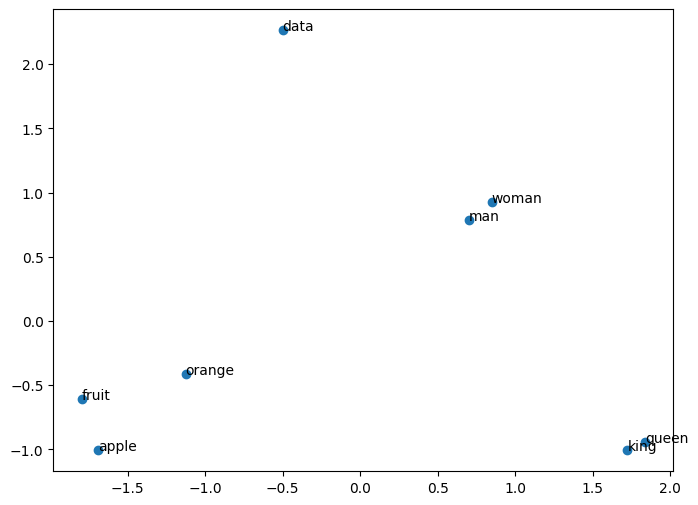

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
# Vector Embedding Visualization
plt.show()


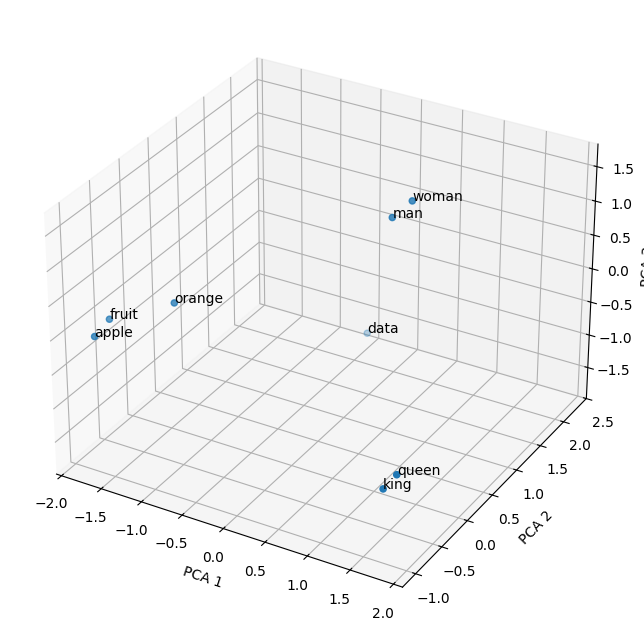

In [29]:
# let's try 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
pca_3d = PCA(n_components=3)
reduced_vectors_3d = pca_3d.fit_transform(word_vectors)
ax.scatter(reduced_vectors_3d[:, 0], reduced_vectors_3d[:, 1], reduced_vectors_3d[:, 2])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
#annotate
for i, word in enumerate(words):
    ax.text(reduced_vectors_3d[i, 0], reduced_vectors_3d[i, 1], reduced_vectors_3d[i, 2], word)
plt.show()
